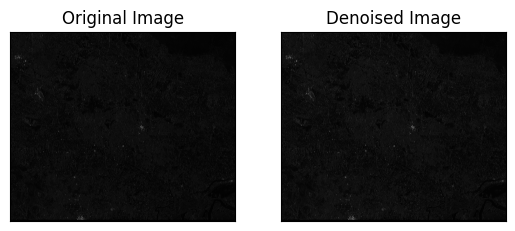

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('/HH-ALPSRP131090550-H2.2_UA.tif', 0)  # Load the TIFF image in grayscale
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)  # Adjust the kernel size as needed
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [4]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

***COLOUR MAPPING***

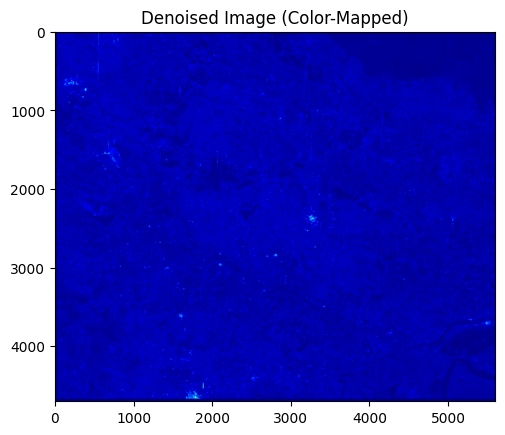

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('/HH-ALPSRP131090550-H2.2_UA.tif', 0)

# Apply noise reduction
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply a colormap for visualization
colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

# Display the color-mapped image
plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

***MEAN SQUARED ERROR***

In [8]:
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread('/HH-ALPSRP131090550-H2.2_UA.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 5.122071352583586


***STRUCTURAL SIMIMILARITY INDEX***

In [9]:
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread('/HH-ALPSRP131090550-H2.2_UA.tif', 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9421639847068262


***READING SPECIFIC PIXEL VALUE***

In [10]:
import cv2
import numpy as np

# # Load the original image
original_image = cv2.imread(r'/HH-ALPSRP131090550-H2.2_UA.tif', 0)  # Load in grayscale

# # Load the denoised image
denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

# Convert the images to NumPy arrays
original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

# Now you can access the pixel values as NumPy arrays
# For example, to access the pixel value at row 1, column 1:
row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 11
Denoised pixel value at (150, 150): 9


***FOURIER TRANSFORM***

Original Image Amplitude (Magnitude):
[[2876.         3004.37050709 3682.9135188  ... 5045.94669982
  3682.9135188  3004.37050709]
 [2725.99088751 4567.66627206 2517.54855153 ... 3944.98413526
  1529.08941105 2770.09176187]
 [3087.49254182  723.47266736 2074.24313153 ... 1139.37219597
  1886.46853821 3156.574569  ]
 ...
 [2795.63191283 2880.43731721 2158.22455877 ... 1250.20852973
  2300.28399787  882.67315845]
 [3087.49254182 3156.574569   1886.46853821 ... 2631.51326526
  2074.24313153  723.47266736]
 [2725.99088751 2770.09176187 1529.08941105 ... 1516.62381522
  2517.54855153 4567.66627206]]
Denoised Image Amplitude (Magnitude):
[[ 898.         2385.27319142 2719.8146469  ...  854.19832051
  2719.8146469  2385.27319142]
 [ 863.52395109  827.43957623  550.51880118 ...  742.41425094
  2288.28437731 1377.25499899]
 [1574.08261854 1956.33052134 1519.54664451 ... 1206.21149302
   884.36394411   53.11081652]
 ...
 [1247.90641665 1787.28165903  131.29325246 ... 2270.10840919
  1038.3635881

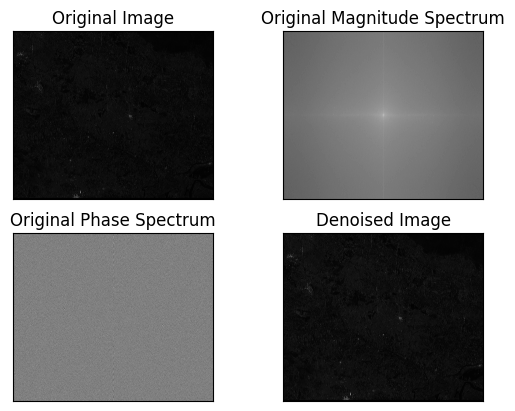

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
original_image = cv2.imread(r'/HH-ALPSRP131090550-H2.2_UA.tif', 0)

# Load the denoised image
denoised_image = cv2.imread('denoised_image.tif', 0)

# Ensure the images are not None
if original_image is not None and denoised_image is not None:
    # Compute the Fourier transform of the original image
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    # Compute the Fourier transform of the denoised image
    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

     # Print amplitude (magnitude) values for both images
    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    # Print phase values for both images
    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    # Display the original image and its Fourier transform
    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    # Display the denoised image and its Fourier transform
    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")